# Part 1: Dataset Exploration

The dataset used for this project is obtained from nuScenes. [NUSCNES](https://www.nuscenes.org/) is a public large-scale dataset for autonomous driving. The data was collected with approximately 1500h of driving data from multiple cities including Singapore. 
There are two main dataset to create a complete autonomous driving system data structure:
1. [nuScenes](https://www.nuscenes.org/nuscenes#data-format) , provide data from the entire sensor suite of an autonomous vehicle (6 cameras, 1 LIDAR, 5 RADAR, GPS, IMU), LIDAR and RADAR able to locate the 3d shape of surrounding object and the relative distances.
2. [NuImage](https://www.nuscenes.org/nuimages), provide data from all the cameras that that focus particularly on the panoptic (things and stuff) and multi-annotation (see above) nature of nuScenes and nuImages.

For this project, the data from `nuImages` will be used as we only want to focus in combination of computer vision and machine learning, the relative location of the surrounding objects are not required. 
The dataset downloaded for educational purpose consists of 93,000 images with instance masks and 2d boxes for 800k foreground objects and 100k semantic segmentation masks. 

The dats stucrures are as shown:

![Image](./assets/images/DataStructure.png)

The steps below shows the example of extracting data from the developer kit designed by nuscenes.org and it is run on **Google Colab** to download the images dataset from host website using `wget`

In [1]:
!mkdir -p /data/sets/nuimages  # Make the directory to store the nuImages dataset in.

!wget https://www.nuscenes.org/data/nuimages-v1.0-mini.tgz  # Download the nuImages mini split.

!tar -xf nuimages-v1.0-mini.tgz -C /data/sets/nuimages  # Uncompress the nuImages mini split.

!pip install nuscenes-devkit &> /dev/null  # Install nuImages.

--2022-09-27 13:34:46--  https://www.nuscenes.org/data/nuimages-v1.0-mini.tgz
Resolving www.nuscenes.org (www.nuscenes.org)... 99.86.224.98, 99.86.224.19, 99.86.224.101, ...
Connecting to www.nuscenes.org (www.nuscenes.org)|99.86.224.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 117929607 (112M) [application/x-tar]
Saving to: ‘nuimages-v1.0-mini.tgz’

nuimages-v1.0-mini. 100%[===================>] 112.47M  45.6MB/s    in 2.5s    

2022-09-27 13:34:49 (45.6 MB/s) - ‘nuimages-v1.0-mini.tgz’ saved [117929607/117929607]



In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from nuimages import NuImages  #The development kit for nuImages.
import matplotlib.pyplot as plt

The steps below shows how to read a single keyframe image from the dataset using build in function

In [3]:
nuim = NuImages(dataroot='/data/sets/nuimages', version='v1.0-mini', verbose=True, lazy=True) ##Load the nuImages dataset.

Loading nuImages tables for version v1.0-mini...
Done loading in 0.000 seconds (lazy=True).


In [5]:
nuim.category[1] # Get the name of the category with index 1.

{'token': 'a86329ee68a0411fb426dcad3b21452f',
 'name': 'flat.driveable_surface',
 'description': 'Surfaces should be regarded with no concern of traffic rules, lanes etc. Exclude any road obstacles. This includes paved and unpaved surfaces'}

In [6]:
nuim.table_names # Get the names of all tables.

['attribute',
 'calibrated_sensor',
 'category',
 'ego_pose',
 'log',
 'object_ann',
 'sample',
 'sample_data',
 'sensor',
 'surface_ann']

In [7]:
sample_idx = 0
sample = nuim.sample[sample_idx] # Get the first sample.
sample

Loaded 50 sample(s) in 0.001s,


{'token': '09acd654cb514bdeab8e3afedad74fca',
 'timestamp': 1535352274870176,
 'log_token': '4ed5d1230fcb48d39db895f754e724f9',
 'key_camera_token': '0128b121887b4d0d86b8b1a43ac001e9'}

In [8]:
sample = nuim.get('sample', sample['token']) # Get the sample data as a dict.
sample

{'token': '09acd654cb514bdeab8e3afedad74fca',
 'timestamp': 1535352274870176,
 'log_token': '4ed5d1230fcb48d39db895f754e724f9',
 'key_camera_token': '0128b121887b4d0d86b8b1a43ac001e9'}

In [9]:
sample['token'] # Get the token of the sample.

'09acd654cb514bdeab8e3afedad74fca'

In [12]:
key_camera_token = sample['key_camera_token'] # Get the token of the key camera.
print(key_camera_token)

0128b121887b4d0d86b8b1a43ac001e9


### Loading and exploring image

In [17]:
nuim.render_image(key_camera_token, annotation_type='all',
                  with_category=True, with_attributes=True, box_line_width=-1, render_scale=4)

Output hidden; open in https://colab.research.google.com to view.

In [18]:
object_tokens, surface_tokens = nuim.list_anns(sample['token']) # Get the tokens of all objects and surfaces in the sample.

Printing object annotations:
06eed0ca8b164b84bbb2851de1ed2c13 vehicle.car ['vehicle.moving']
0e8ba57c7b69482c88319f5c1b4deeb0 movable_object.trafficcone []
11ec9a46540443339e2e38afbe31f7b1 human.pedestrian.adult ['pedestrian.standing']
4b27e4a70d464cb2a2f33d5dbcf85094 human.pedestrian.adult ['pedestrian.moving']
4c76bc9ee7da40668f1d4b294209ae3b human.pedestrian.adult ['pedestrian.standing']
4e61ccd6905644adb0556e1f336cee79 movable_object.barrier []
584cb4bd0e7c4a0b8b1169191ca828a1 vehicle.car ['vehicle.moving']
677a87b7df1a4ee7a7a36bab569cccbd human.pedestrian.adult ['pedestrian.moving']
683e330396134c6393fd77187194990c human.pedestrian.adult ['pedestrian.moving']
82e0c68c0f2440bcb041a51a6f116513 human.pedestrian.adult ['pedestrian.moving']
8dc2b24b1a69434a8aade0cb4e308e8e vehicle.car ['vehicle.moving']
924572ff00404ae59d1ee2f6f6c92274 human.pedestrian.adult ['pedestrian.moving']
9b8ea679730b43d7b6631ceeb56e0ccf human.pedestrian.adult ['pedestrian.moving']
a457fc08800444bc83900e3a12b00

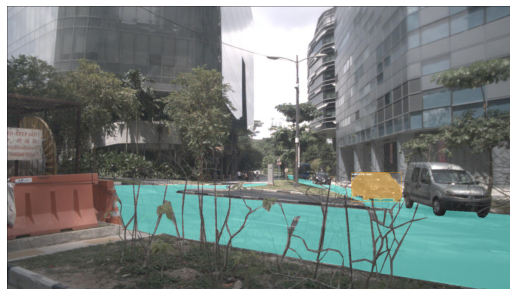

In [21]:
nuim.render_image(key_camera_token, with_category=True, object_tokens=[object_tokens[0]], surface_tokens=[surface_tokens[0]]) # Render the first object and surface.

In [22]:

semantic_mask, instance_mask = nuim.get_segmentation(key_camera_token) # Get the semantic and instance masks.

In [29]:

instance_mask.shape # Get the shape of the instance mask.

(900, 1600)

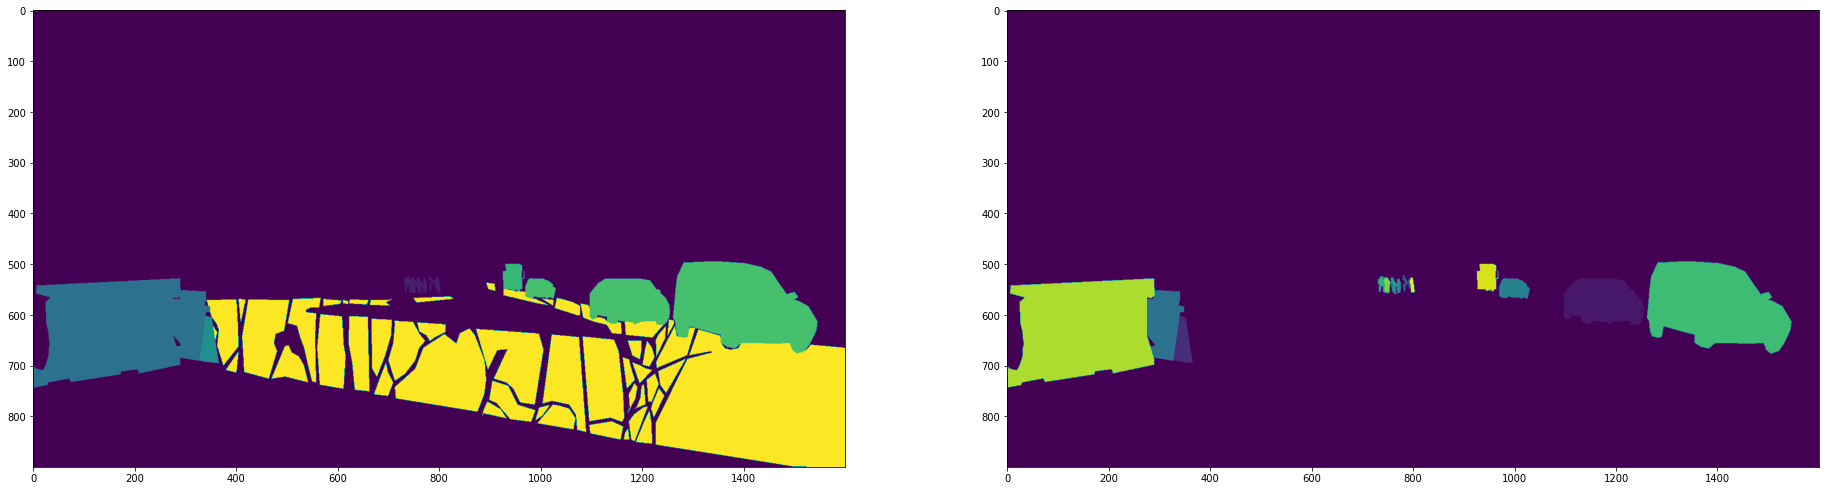

In [27]:
plt.figure(figsize=(32, 9))

plt.subplot(1, 2, 1)
plt.imshow(semantic_mask)
plt.subplot(1, 2, 2)
plt.imshow(instance_mask)

plt.show()

The main different between semantic mask and instance mask is, the semantic mask apply the same mask on the objects in same category while instance mask label each object as a individual instance with specific mask.
Both mask located and segmented the objects in the image, and are all suitable for this project.

In [30]:
nuim.list_sample_content(sample['token']) # Get the tokens of all data in the sample.


Listing sample content...
Rel. time	Sample_data token
     -3.0	0b4fd0e270f2421fbdb7c27caadbc593
     -2.5	f3eadc785a024b3b8af093927d476c2a
     -2.0	aa7dee3a4b824f8a9d894398f18ba1c4
     -1.5	051086dc1e8243fab8731ef5ad7e90a8
     -1.0	26ce6186cc71496fbe07b0b1988c6fb5
     -0.5	24614975bbb34bf385559d958df8008b
      0.0	0128b121887b4d0d86b8b1a43ac001e9
      0.5	5bdc01f564a14f0196817df2a53a41da
      1.0	0a6a50a883f842cba3bf758925b391c6
      1.5	be49e96e81ec4314a6db1f73112ae08f
      2.0	8a18bc3e590b4e0ba904ada6259d1122
      2.5	f1d8370634a948f78084681c25eb9fd6
      3.0	c079819d1520412eb8b99b1c485b1718


In [31]:
next_camera_token = nuim.get('sample_data', key_camera_token)['next'] # Get the token of the next camera.
next_camera_token

'5bdc01f564a14f0196817df2a53a41da'

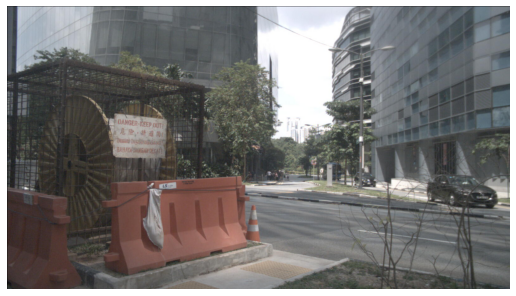

In [32]:
try:
    nuim.render_image(next_camera_token, annotation_type='none')
except Exception as e:
    print('As expected, we encountered this error:', e)

In [33]:
nuim.list_logs()    # Get the tokens of all logs.

Loaded 44 log(s) in 0.000s,

Samples Log                           Location                
     1 n003-2018-01-03-12-03-23+0800 singapore-onenorth      
     1 n003-2018-01-04-11-23-25+0800 singapore-onenorth      
     1 n003-2018-01-08-11-30-34+0800 singapore-onenorth      
     1 n003-2018-07-12-15-40-35+0800 singapore-onenorth      
     1 n004-2018-01-04-11-05-42+0800 singapore-onenorth      
     2 n005-2018-06-14-20-11-03+0800 singapore-onenorth      
     1 n006-2018-09-17-12-15-45-0400 boston-seaport          
     1 n008-2018-03-14-15-16-29-0400 boston-seaport          
     3 n008-2018-05-21-11-06-59-0400 boston-seaport          
     1 n008-2018-05-30-15-20-59-0400 boston-seaport          
     2 n008-2018-05-30-16-31-36-0400 boston-seaport          
     1 n008-2018-06-04-16-30-00-0400 boston-seaport          
     1 n008-2018-09-18-14-18-33-0400 boston-seaport          
     1 n009-2018-05-08-15-52-41-0400 boston-seaport          
     1 n009-2018-09-12-09-59-51-0400 bos

The log file is important as this project will focus on the Singapore Road, so the training dataset will be filtered out with only the images taken on Singapore road

In [34]:
nuim.list_categories(sort_by='object_freq') # Get the tokens of all categories sorted by object frequency.


Object_anns Surface_anns Name                     Description                                     
        189            0 human.pedestrian.adult   Adult subcategory.                              
        122            0 vehicle.car              Vehicle designed primarily for personal use, e.g
         70            0 movable_object.barrier   Temporary road barrier placed in the scene in or
         44            0 movable_object.trafficco All types of traffic cone.                      
         28            0 vehicle.truck            Vehicles primarily designed to haul cargo includ
         14            0 vehicle.bicycle          Human or electric powered 2-wheeled vehicle desi
         14            0 vehicle.motorcycle       Gasoline or electric powered 2-wheeled vehicle d
          6            0 human.pedestrian.constru Construction worker                             
          5            0 vehicle.bus.rigid        Rigid bus subcategory.                          
         

### The nuImage developer kit is very user freindly and built perfectly specifically for the data structures as designed. 
However, this project require the extraction of the data in different format in order to be put into ML process that fit into other environment. Thus the customization of the data structures would be necessary, in the next session. 